# Background 

I chose to use a dataset that studies the size of forest fires based on a variety of predictors from UCI’s machine learning repository (data was collected in Northern Portugal). 

My goal is to build data analysis models to determine predictors in the dataset that could be used to predict how large a forest fire will be. The response variable is the area measured in hectares (ha: 1 ha = 10,000 meters^2) a fire was able to burn before being put out.

This anlaysis is useful because if firefighters can predict how large a fire will be, they can adequately prepare to fight it. For example, if a fire is predicted to be small, they can send fewer resources to fight it than they would have otherwise. This is especially useful during the fire season, when the fire department has to fight multiple fires simultaneously.  

Analysis on this dataset can also give some clues as to some causes of fires. This could be useful in predicting where and when fires will occur. 

Variables: 
"1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform)."

Reference for dataset and variable descriptions: https://archive.ics.uci.edu/ml/datasets/forest+fires

Reference for study that dataset was originally used for: http://www3.dsi.uminho.pt/pcortez/fires.pdf

Reference: 
https://en.wikipedia.org/wiki/Hectare

# Milestone 2 Variable Selection 

1.1 Created Scatterplot 

Saving forestfires.csv to forestfires.csv


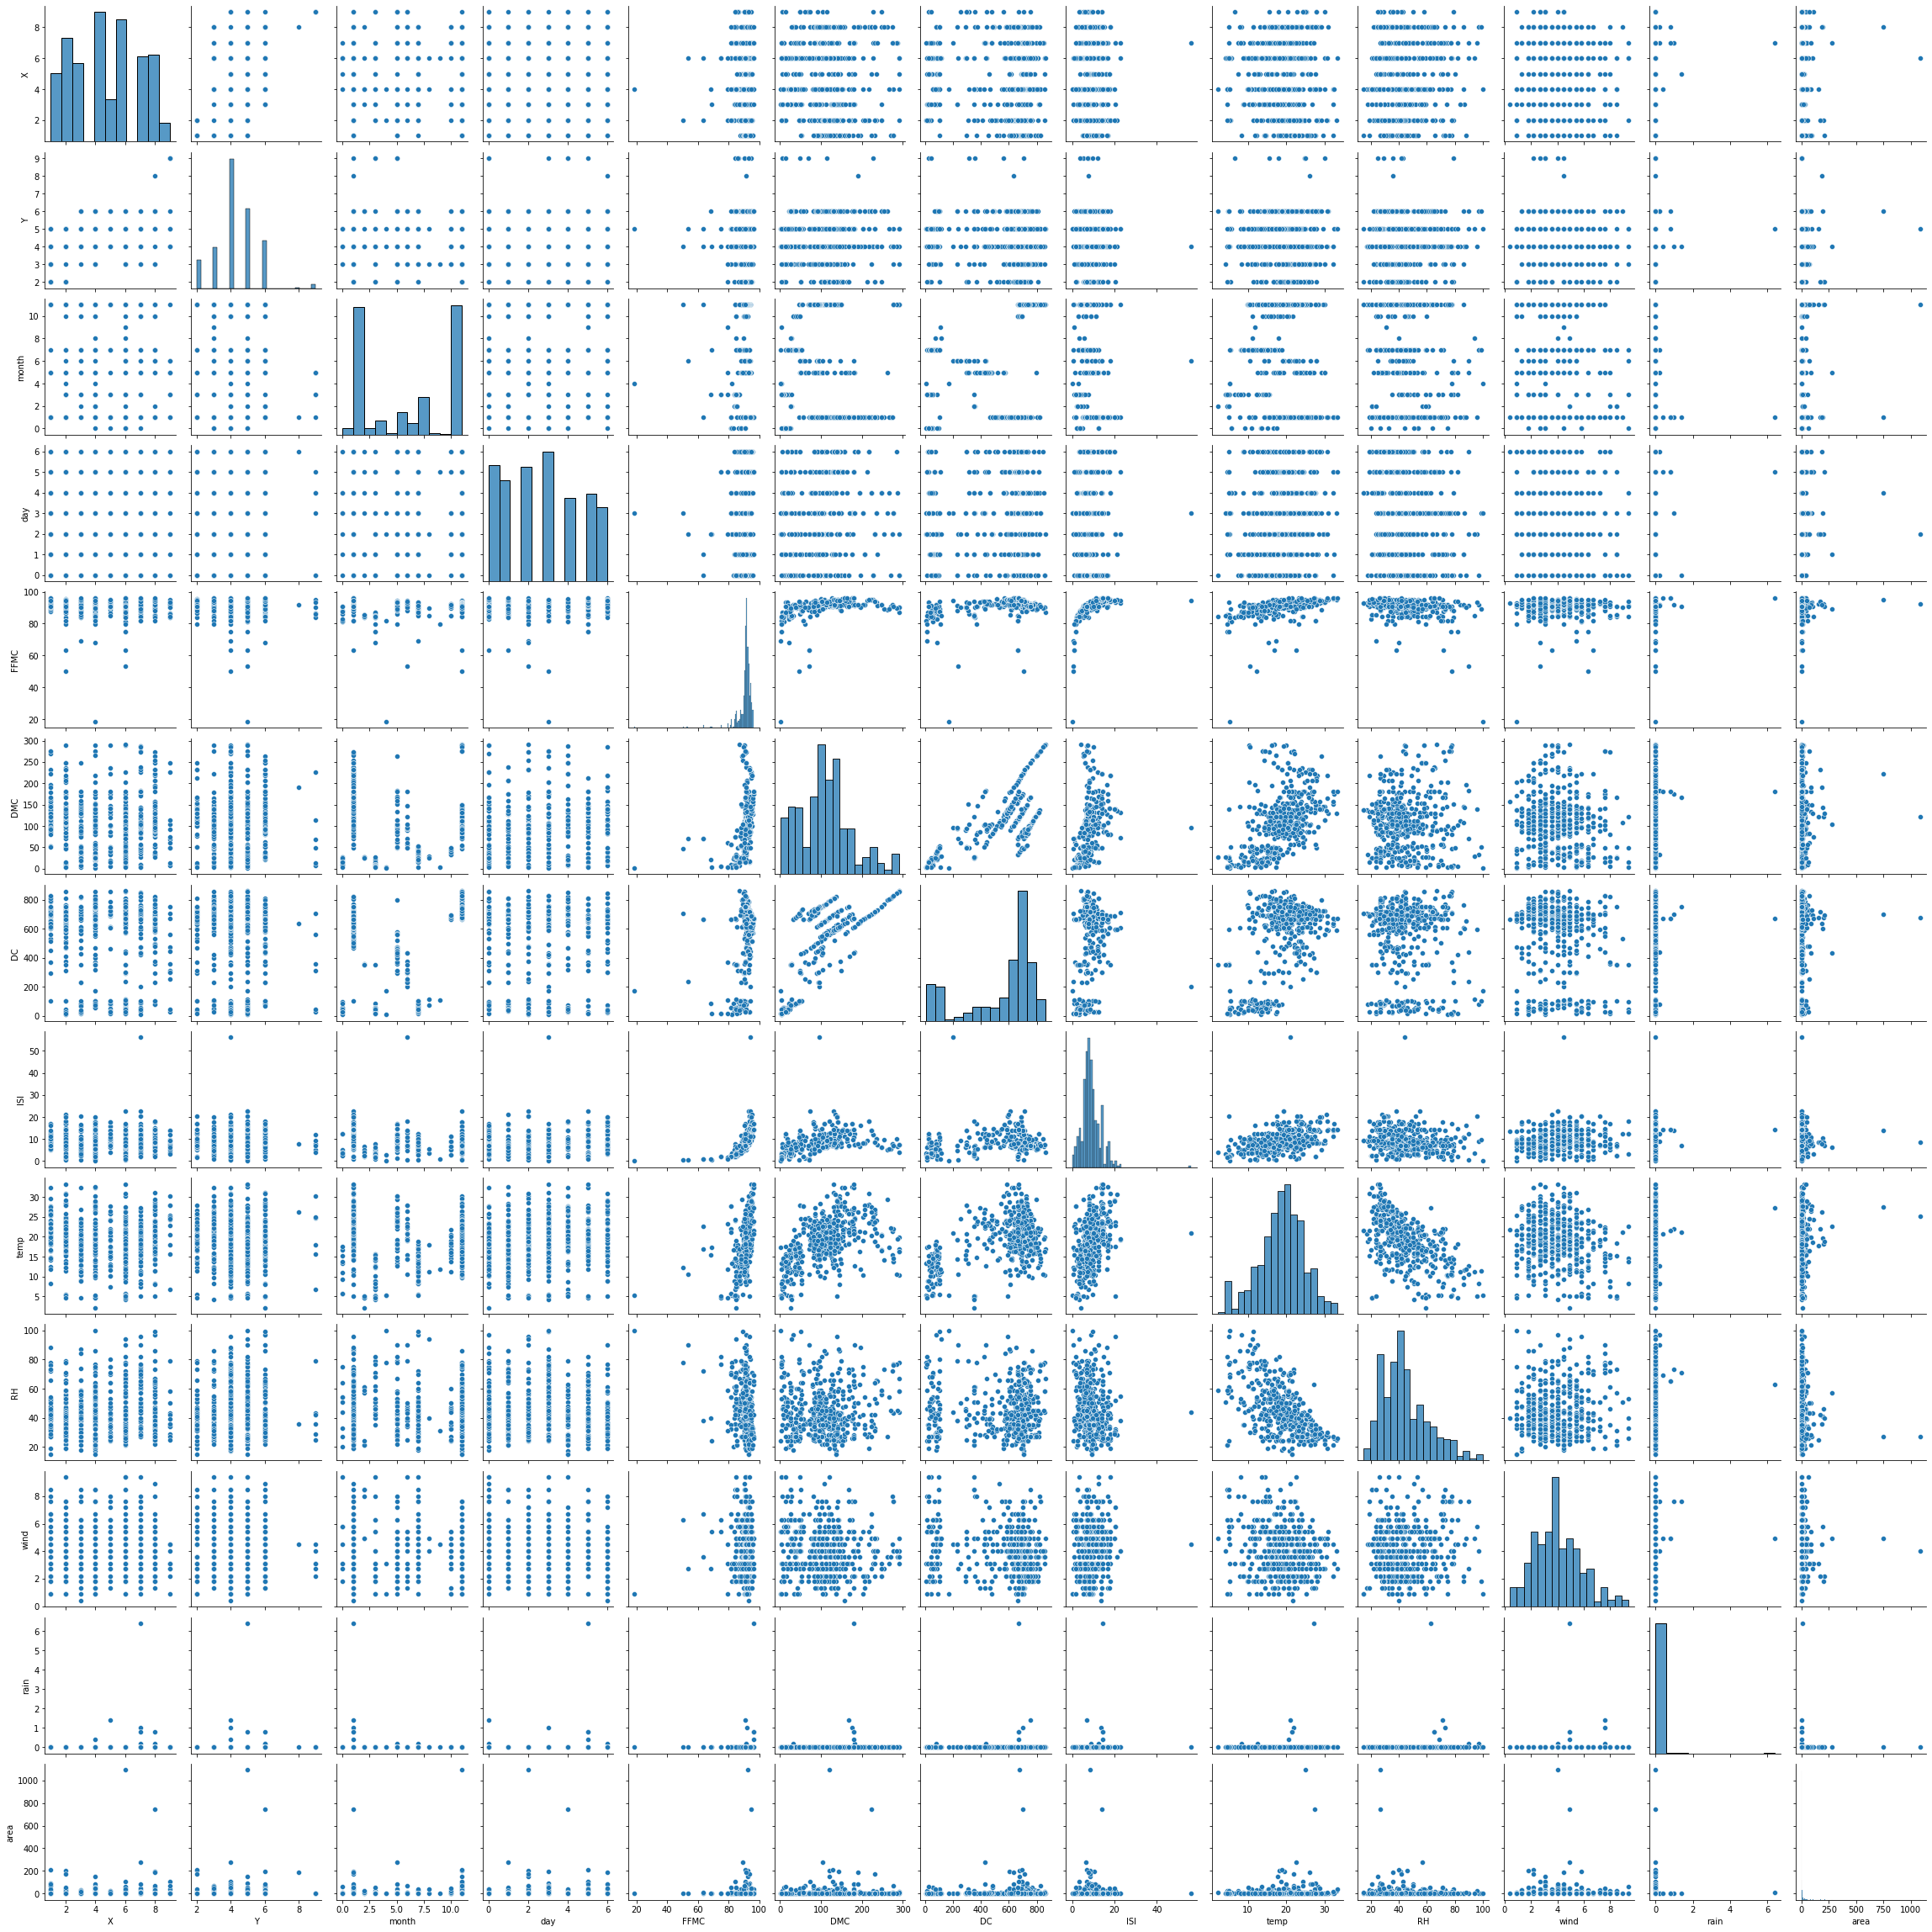

In [ ]:
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fire = pd.read_csv('C:/Users/Travis Froberg/Documents/AA_MTU Graduate School/Data Mining Course/Datasets/forestfires.csv')

from google.colab import files
uploaded = files.upload()

Fire = pd.read_csv("forestfires.csv")

Fire2 = Fire

# Fire2 = Fire.drop(['rain'], axis = 1)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import itertools

Fire2['month'] = Fire2['month'].astype('category')
Fire2['month'] = Fire2['month'].cat.codes

Fire2['day'] = Fire2['day'].astype('category')
Fire2['day'] = Fire2['day'].cat.codes

y = Fire2.area
X = Fire2.drop(labels = 'area', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.pairplot(Fire2)

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X_train /= X_train.std(axis=0)
X_test /= X_test.std(axis=0)
#y_train /= y_train.std(axis=0)
#y_test /= y_test.std(axis=0)


**PreProcessing Comments **

Interpretation of Scatter Plots and Histograms  

Scatterplots: 

The variables DC and DMC seem to have a strong positive linear correlation.
DMC and DC also have moderate postive linear correlations with temp.  

Temp and RH have a moderate negative correlation. 

It is possible that the variables X and Y have a positive linear correlation, however, if it exists it is very slight. 

Histograms: 

From the histograms it seems that a few predictors are skewed. In particular, the variable FFMC is highly skewed to the left and ISI is highly skewed to the right. 

DMC and RH have a slight skew to the right. 
DC has a moderate skew to the left. 

Rain has an extremely high skew to the right. 

Although some of my predictors were skewed, I decided not to perform the BoxCox transformation due to problems with interpretability. BoxCox transforms the data in such a way that is not very intuitive for a beginner and, therefore, I thought it would affect my ability to interpret the models.  

One other transformation I considered was a log transformation on the variable FFMC because it is so highly skewed. However, I decided not to perform this transformation because FFMC is highly skewed to the left, whereas a log transformation is more appropriate for data that is skewed to the right. 

One transformation I did perform was scaling the predictors. 

Also, the response variable "area" does not seem to be linearly correlated with any of the predictors. This will likely affect linear regression models. 



Linear Regression 

In [55]:
from sklearn.linear_model import LinearRegression

#define model
model_ln = LinearRegression()

#fit model
model_ln.fit(X_train, y_train)

# Predict 
predictedValuesLn = model_ln.predict(X_test)
# print(predictedValuesRidge2)

mseLn = mean_squared_error(y_test, predictedValuesLn)
print("Test Set RMSE for Multiple Linear Regression:", math.sqrt(mseLn))

df_coefLn = pd.concat([pd.DataFrame({'Linear Regression':model_ln.coef_})])
print("Feature Coefficients for Linear Regression")
print(df_coefLn)

# Reference: https://realpython.com/linear-regression-in-python/#implementing-linear-regression-in-python


Test Set RMSE for Multiple Linear Regression: 0.8134233963063192
Feature Coefficients for Linear Regression
    Linear Regression
0            0.028801
1            0.039537
2           -0.041230
3            0.011049
4            0.036332
5           -0.090798
6            0.110481
7           -0.003313
8            0.018413
9           -0.019988
10           0.027133


1.2 Ridge Regression (CV)

Alpha values for Ridge Regression and Their Corresponding RMSE Values
Ridge Alpha: 1e-05 RMSE: 0.6141340775665405
Ridge Alpha: 0.0001291549665014884 RMSE: 0.6141340168250952
Ridge Alpha: 0.0016681005372000592 RMSE: 0.6141332323449793
Ridge Alpha: 0.021544346900318846 RMSE: 0.614123104699758
Ridge Alpha: 0.2782559402207126 RMSE: 0.6139930163433253
Ridge Alpha: 3.593813663804626 RMSE: 0.6124261830695388
Ridge Alpha: 46.41588833612782 RMSE: 0.6032905854755445
Ridge Alpha: 599.4842503189421 RMSE: 0.6283041278581769
Ridge Alpha: 7742.636826811277 RMSE: 0.633170607672827
Ridge Alpha: 100000.0 RMSE: 0.5003764200322111


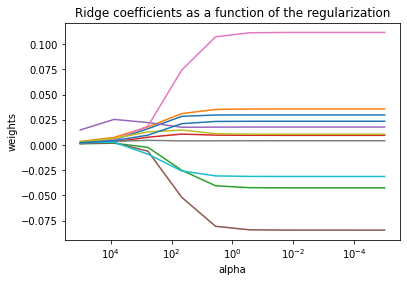

Best Alpha Value Based on CV: 0
Test Set RMSE for Ridge Regression (CV for Tuning Parameter): 0.8134233963063188
Feature Coefficients for Ridge Regression
       Ridge
0   0.028801
1   0.039537
2  -0.041230
3   0.011049
4   0.036332
5  -0.090798
6   0.110481
7  -0.003313
8   0.018413
9  -0.019988
10  0.027133


In [56]:
# Ridge

from sklearn import linear_model

n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)


print("Alpha values for Ridge Regression and Their Corresponding RMSE Values")
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    ypred = ridge.predict(X_test)
    coefs.append(ridge.coef_)
    alph_ridge = a
    mse = mean_squared_error(y_test, ypred)
    print("Ridge Alpha:", a, "RMSE:", np.sqrt(mse))
    # print("RidgeScore:, RMSE:".format(RidgeScore, np.sqrt(mse))) 

# #############################################################################
# Display results
# RidgeScore = ridge.score(X_train, y_train)
# print(RidgeScore)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Predict 
from sklearn.model_selection import RepeatedKFold
from numpy import arange

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=arange(0, 650, 1), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print("Best Alpha Value Based on CV:", model.alpha_)

# Predict 
predictedValuesRidge2 = model.predict(X_test)
# print(predictedValuesRidge2)

mseRidge2 = mean_squared_error(y_test, predictedValuesRidge2)
print("Test Set RMSE for Ridge Regression (CV for Tuning Parameter):", math.sqrt(mseRidge2))

df_coefRidge = pd.concat([pd.DataFrame({'Ridge':model.coef_})])
print("Feature Coefficients for Ridge Regression")
print(df_coefRidge)

# References for ElasticNet, Lasso, and Ridge models. Note that some of the code comes from class lectures as well. 
# Reference: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/#:~:text=The%20scikit-learn%20Python%20machine%20learning%20library%20provides%20an,%28n_repeats%29.%20A%20good%20default%20for%20k%20is%20k%3D10.
# Reference: https://www.datatechnotes.com/2019/07/ridge-regression-example-in-python.html
# Reference: https://www.statology.org/ridge-regression-in-python/#:~:text=Ridge%20Regression%20in%20Python%20%28Step-by-Step%29%20Ridge%20regression%20is,that%20minimize%20the%20sum%20of%20squared%20residuals%20%28RSS%29%3A

Interpretation Ridge Regression: 

The penalty used in ridge reg. shrunk the coefficients from general linear reg. by a very slight amount. For the most part, it shrunk the coefficients by about .01. 

The test RMSE was lowered by about .004, which is not very significant.

The best alpha value chosen when I ran a loop to choose alpha instead of using cv was:
      Ridge Alpha: 599.4842503189421 RMSE: 80.44372739416052
This is a very different value than was chosen by CV: 
      Best Alpha Value Based on CV: 0.99


1.3 Lasso Regression (CV)

Lasso Alpha: 1e-10 RMSE: 0.6141340827188929
Lasso Alpha: 4.641588833612773e-09 RMSE: 0.6141340852166315
Lasso Alpha: 2.1544346900318867e-07 RMSE: 0.614134201868569
Lasso Alpha: 1e-05 RMSE: 0.6141396379127427
Lasso Alpha: 0.0004641588833612782 RMSE: 0.6143834420815175
Lasso Alpha: 0.021544346900318867 RMSE: 0.6510794136084275
Lasso Alpha: 1.0 RMSE: 0.6533841319020034
Lasso Alpha: 46.415888336127914 RMSE: 0.7272180923534245
Lasso Alpha: 2154.4346900318865 RMSE: 0.7272180923534245
Lasso Alpha: 100000.0 RMSE: 0.7272180923534245


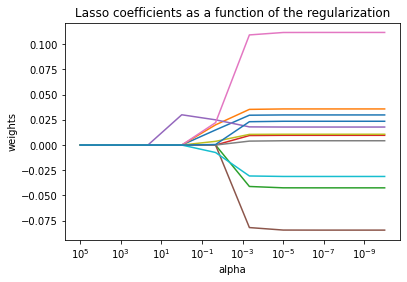

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.83944372868343, tolerance: 0.009255525606469004
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.49284504320298, tolerance: 0.009255525606469004
  tol, rng, random, positive)
/usr/l

Lasso Alpha Value for Test Set Chosen by CV 99.99000000000001
Lasso RMSE on Test Set 0.4992815813068409
    Lasso
0     0.0
1     0.0
2    -0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9    -0.0
10    0.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.24695334524292, tolerance: 0.009293279569892472
  tol, rng, random, positive)


In [65]:
# Lasso
from sklearn import linear_model

n_alphas = 10
alphas = np.logspace(-10, 5, n_alphas)

coefsLasso = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    ypred_lasso = lasso.predict(X_test)
    alph = a
    mseLasso = mean_squared_error(y_test, ypred_lasso)
    print("Lasso Alpha:", alph, "RMSE:", np.sqrt(mseLasso))
    coefsLasso.append(lasso.coef_)

# #############################################################################
# Display results

ax = plt.gca()
ax.plot(alphas, coefsLasso)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Cross Validation 

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
modelLasso = LassoCV(alphas=arange(0, 100, 0.01), cv=cv)

#fit model
modelLasso.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print("Lasso Alpha Value for Test Set Chosen by CV", modelLasso.alpha_)

# Predict 
predictedValuesLasso = modelLasso.predict(X_test)
# print(predictedValuesLasso)

mseLasso = mean_squared_error(y_test, predictedValuesLasso)
print("Lasso RMSE on Test Set", math.sqrt(mseLasso))

df_coefLasso = pd.concat([pd.DataFrame({'Lasso':modelLasso.coef_})], axis = 1)
print(df_coefLasso)


1.4 Lasso Regression (AIC and BIC) 

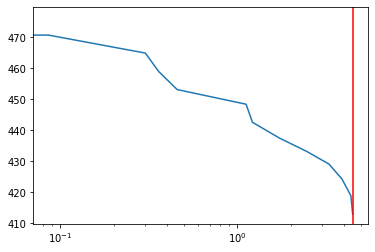

   features  coeficients
0         X          0.0
1         Y          0.0
2     month          0.0
3       day          0.0
4      FFMC          0.0
5       DMC          0.0
6        DC          0.0
7       ISI          0.0
8      temp          0.0
9        RH          0.0
10     wind          0.0
11     rain          0.0


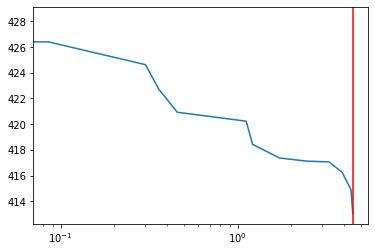

   features  coeficients
0         X          0.0
1         Y          0.0
2     month          0.0
3       day          0.0
4      FFMC          0.0
5       DMC          0.0
6        DC          0.0
7       ISI          0.0
8      temp          0.0
9        RH          0.0
10     wind          0.0
11     rain          0.0


In [ ]:
# Lasso based on BIC and AIC 

from sklearn.linear_model import LassoLarsIC

LassoBIC = LassoLarsIC(criterion='bic', normalize=False)
LassoBIC.fit(X_train, y_train)

# Plot BIC vs log(lambda)
# The red vertical line is where the information criteria is minimized
plt.semilogx(LassoBIC.alphas_,LassoBIC.criterion_)
plt.axvline(LassoBIC.alpha_, color='red')
plt.show()

# Estimated coefficients chosen by BIC
df_coef_LassoBIC = pd.concat([pd.DataFrame({'features':list(X_train.columns)}),pd.DataFrame({'coeficients':LassoBIC.coef_})], axis=1, join='inner')
print(df_coef_LassoBIC)

# AIC 

LassoAIC = LassoLarsIC(criterion='aic', normalize=False)
LassoAIC.fit(X_train, y_train)

# Plot BIC vs log(lambda)
# The red vertical line is where the information criteria is minimized
plt.semilogx(LassoAIC.alphas_,LassoAIC.criterion_)
plt.axvline(LassoAIC.alpha_, color='red')
plt.show()

# Estimated coefficients chosen by BIC
df_coef_LassoAIC = pd.concat([pd.DataFrame({'features':list(X_train.columns)}),pd.DataFrame({'coeficients':LassoAIC.coef_})], axis=1, join='inner')
print(df_coef_LassoAIC)

1.5 Elastic Net regression (CV)

Enet Alpha Score: 1e-10 RMSE: 0.6141340826813865
Enet Alpha Score: 4.641588833612773e-09 RMSE: 0.6141340834680145
Enet Alpha Score: 2.1544346900318867e-07 RMSE: 0.6141341189272708
Enet Alpha Score: 1e-05 RMSE: 0.6141357798426235
Enet Alpha Score: 0.0004641588833612782 RMSE: 0.6142140039672418
Enet Alpha Score: 0.021544346900318867 RMSE: 0.6168842597855092
Enet Alpha Score: 1.0 RMSE: 0.6980889160986068
Enet Alpha Score: 46.415888336127914 RMSE: 0.7272180923534245
Enet Alpha Score: 2154.4346900318865 RMSE: 0.7272180923534245
Enet Alpha Score: 100000.0 RMSE: 0.7272180923534245


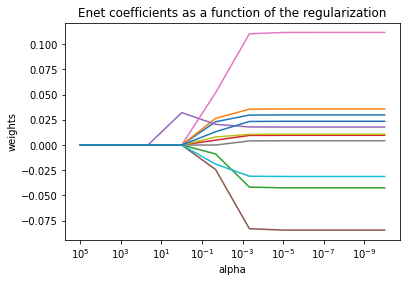

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.839443728683435, tolerance: 0.009255525606469004
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.492845043202976, tolerance: 0.009255525606469004
  tol, rng, random, positive)
/usr

Elastic Net Alpha Chosen by CV: 9.99
Elastic Net RMSE on Test Set 0.4992815813068409
    Enet
0    0.0
1    0.0
2   -0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9   -0.0
10   0.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.92032029350315, tolerance: 0.009290322580645164
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.28443187341812, tolerance: 0.009278225806451611
  tol, rng, random, positive)
/usr/l

In [64]:
# Enet
from sklearn import linear_model

n_alphas = 10
alphas = np.logspace(-10, 5, n_alphas)

coefsEnet = []
for a in alphas:
    enet = linear_model.ElasticNet(alpha=a, fit_intercept=False)
    enet.fit(X_train, y_train)
    ypred_enet = enet.predict(X_test)
    alph_enet = a
    mseEnet = mean_squared_error(y_test, ypred_enet)
    print("Enet Alpha Score:", alph_enet, "RMSE:", np.sqrt(mseEnet))
    coefsEnet.append(enet.coef_)

# #############################################################################
# Display results

ax = plt.gca()
ax.plot(alphas, coefsEnet)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Enet coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# CV

# Cross Validation 

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
modelEnet = ElasticNetCV(alphas=arange(0, 10, 0.01), cv=cv)

#fit model
modelEnet.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print("Elastic Net Alpha Chosen by CV:", modelEnet.alpha_)

# Predict 
predictedValuesEnet = modelEnet.predict(X_test)
# print(predictedValuesEnet)

mseEnet = mean_squared_error(y_test, predictedValuesEnet)
print("Elastic Net RMSE on Test Set", math.sqrt(mseEnet))

df_coefEnet = pd.concat([pd.DataFrame({'Enet':modelEnet.coef_})], axis = 1, join = 'inner')
print(df_coefEnet)


Interpretation Elastic Net 

The best alpha value chosen for the loop was: 
        Enet Lamda Score: 1.0 RMSE: 80.44147628271533

This value was essentially the same as the best alpha value chosen by CV when building the model, which was .99. 

Looking at the regularaizaiton vs. alpha graph, it makes sense that an alpha was chosen that is between about 5 and .1. This is because any alpha values greater than about 10 shrink all of the coefficients to 0 and a value less than .1 separates the coeficcients to about there values in the general linear model. 

The elastic net model shrunk the coefficients for most of the variables quite extensively. 

The variables "day" and "rain" were shrunk to 0. This is much less than in the Lasso model, which makes sense. Elastic net is a hybrid between ridge and lasso, so it makes sense that it shrunk the coefficients more than in the general linear model, and also shrunk less to 0 than in the lasso model. 

1.6 Forward Selection (C_p, AIC, BIC, Adjusted-R^2)

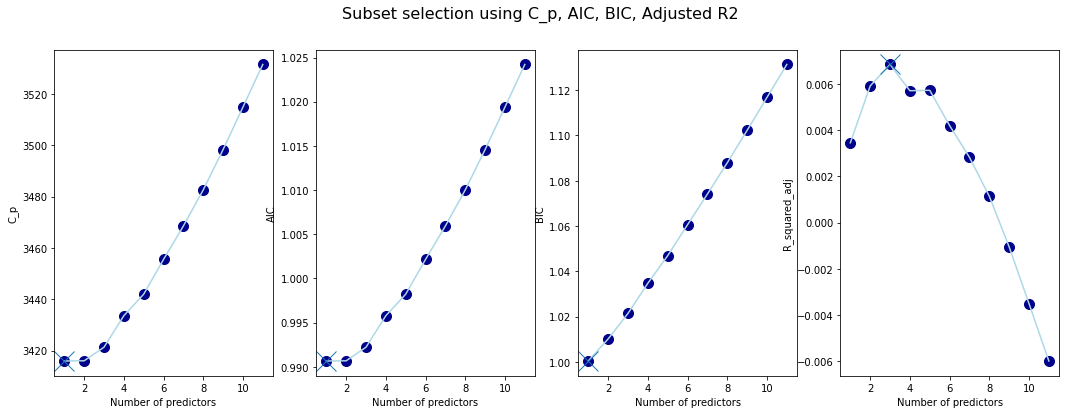

                                             features           RSS  \
1                                              [temp]  1.403881e+06   
2                                       [temp, month]  1.397012e+06   
3                                    [temp, month, X]  1.392302e+06   
4                                [temp, month, X, RH]  1.390488e+06   
5                           [temp, month, X, RH, DMC]  1.387052e+06   
6                      [temp, month, X, RH, DMC, ISI]  1.385763e+06   
7                [temp, month, X, RH, DMC, ISI, wind]  1.384256e+06   
8            [temp, month, X, RH, DMC, ISI, wind, DC]  1.383170e+06   
9         [temp, month, X, RH, DMC, ISI, wind, DC, Y]  1.382769e+06   
10  [temp, month, X, RH, DMC, ISI, wind, DC, Y, rain]  1.382716e+06   
11  [temp, month, X, RH, DMC, ISI, wind, DC, Y, ra...  1.382690e+06   

    R_squared  numb_features          C_p       AIC       BIC  R_squared_adj  
1    0.005870              1  3415.926199  0.990667  1.000409       

['temp', 'month', 'X', 'RH', 'DMC', 'ISI']

In [ ]:
# Forward Selection 

import itertools

# Make a function that fits a linear regression model and return RSS and R squared values
def fit_linear_reg(X, Y):    
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X, Y)
    RSS = mean_squared_error(Y, model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

# Forward stepwise selection
Y = y_train
X = X_train
k = 11

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

# Save the RSS and R squared.
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

# Calculate Mallow's Cp, AIC, BIC, and adjusted R2.
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))

# plot model selection criteria against the model complexity.
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

pd.set_option('display.max_columns', None)
print(df1)

df1['features'][6]


Forward Seleciton Interpretation 

Forward selection perfromed very poorly on this dataset, with no adjusted-R^2 value even above .01. 

C_p, AIC, and BIC also did not perform well, with all of them choosing to keep 1 predictor according to the Subset Selection Plots. Adjusted R^2 kept 3 predictors, however, as I stated above, it had very low values. 

I believe the problem is that my predictors are not linearly correlated with the response variable. This means that the model can't even find a couple predictors that are linearly correlated enough to work well. This theory is supported by the fact that the model chose "temp" as the first variable, which is the most linearly correlated predictor with the response (although, it is not a strong correlation and may not even be significant). 

Increasing the number of predictors did make the models have better information criteria values, but to a negligable extent. Overall, I do not think this model worked for my data. 

1.7 Best Subset Selection (BIC, AIC, and Adjusted R^2)

In [ ]:
# Most code for the following sections is from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model_bestSub = sm.OLS(y_train,X_train[list(feature_set)])
    regr_bestSub = model_bestSub.fit()
    RSS = ((regr_bestSub.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr_bestSub, "RSS":RSS}

In [ ]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 12 models on 1 predictors in 0.04181098937988281 seconds.
Processed 66 models on 2 predictors in 0.18687200546264648 seconds.
Processed 220 models on 3 predictors in 0.6279208660125732 seconds.
Processed 495 models on 4 predictors in 1.5047836303710938 seconds.
Processed 792 models on 5 predictors in 2.2500808238983154 seconds.
Processed 924 models on 6 predictors in 2.6824498176574707 seconds.
Processed 792 models on 7 predictors in 2.3170957565307617 seconds.
Total elapsed time: 9.682587623596191 seconds.


In [ ]:
models_best

print(models_best.loc[12, "model"].summary())

# Show the best 12-variable model (there's actually only one)
print(getBest(12)["model"].summary())

models_best.loc[12, "model"].rsquared

# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

                                 OLS Regression Results                                
Dep. Variable:                   area   R-squared (uncentered):                   0.044
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              9.474
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                    9.50e-05
Time:                        04:40:44   Log-Likelihood:                         -2264.5
No. Observations:                 413   AIC:                                      4533.
Df Residuals:                     411   BIC:                                      4541.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

1    0.040873
2    0.044070
3    0.046959
4    0.052264
5    0.052975
6    0.053650
7    0.054407
dtype: float64

Text(0, 0.5, 'BIC')

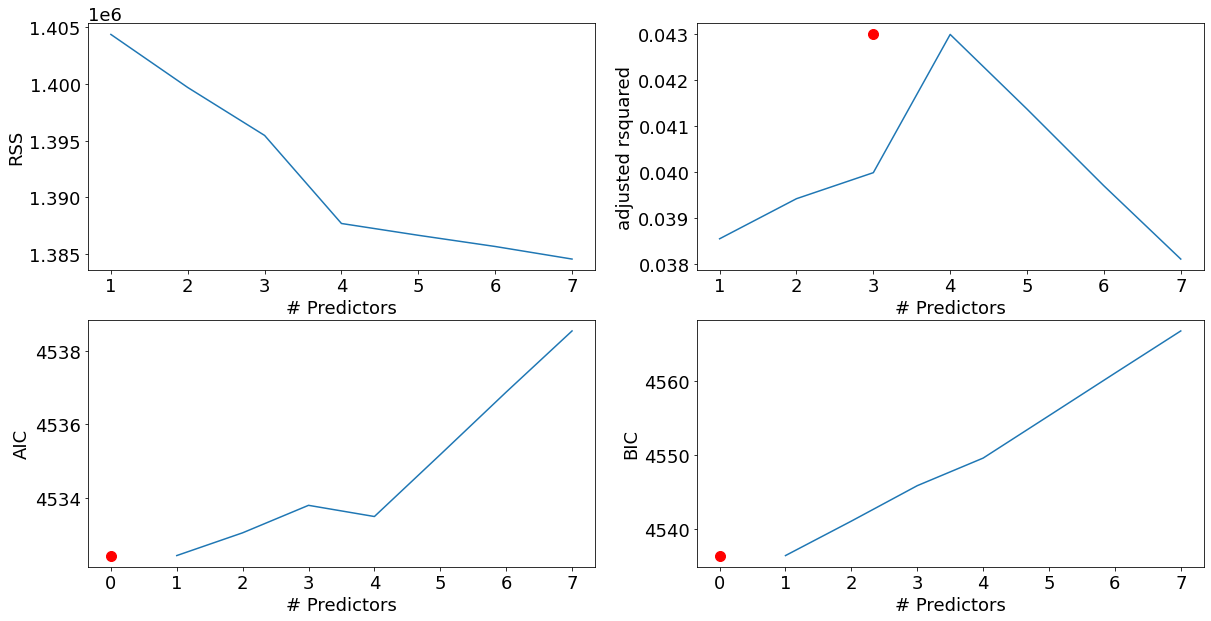

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')


Interpretation Best Subset 

The above plots show information criteria values for AIC, BIC, RSS, and Adjusted R-squared for various numbers of predictors. The X-axis of the red dot indicates how many predictors the model suggests to retain. Like forward selection, best subset did very poorly, with the AIC and BIC criteria suggesting to retain 0 predictors. I think the problem is the same as in forward selection: the predictors are not linearly correlated with the response. 

1.8 Backward Selection 

In [ ]:
# Backward Selection 
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fire2 = Fire.drop(['rain'], axis = 1)

Fire2 = Fire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import itertools

Fire2['month'] = Fire2['month'].astype('category')
Fire2['month'] = Fire2['month'].cat.codes

Fire2['day'] = Fire2['day'].astype('category')
Fire2['day'] = Fire2['day'].cat.codes

y = Fire2.area
X = Fire2.drop(labels = 'area', axis = 1)

extraColumn = np.empty(517)
extraColumn.fill(1)
# print(extraColumn)

X = X.assign(new_col = extraColumn)
# print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  new_col
0    7  5      7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0      1.0
1    7  4     10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0      1.0
2    7  4     10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0      1.0
3    8  6      7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2      1.0
4    8  6      7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0      1.0
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...      ...
512  4  3      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0      1.0
513  2  4      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0      1.0
514  7  4      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0      1.0
515  1  4      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0      1.0
516  6  3      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0      1.0

[517 rows x 13 columns]
Processed  13 models on 12 

In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[7, "model"].params)

print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

------------
Best Subset:
------------
X        3.581807
month    3.769109
DMC      4.092052
ISI     -2.329457
temp     1.596774
RH      -4.596608
wind     1.595571
dtype: float64
-------------------
Backward Selection:
-------------------
X        1.571324
month    0.858436
DMC      0.064034
ISI     -0.502081
temp     0.285754
RH      -0.281951
wind     0.874571
dtype: float64


Backward Selection and Best Subset Interpretation 

Interpretation is very similiar to forward selection. Best subset and backward selection did not do well on my data because the predictors are not linearly correlated with the response. 

Best Subset and Backward seleciton ranked the first 7 predictors chosen the same, as can be seen in the tables above. 

# Milestone 3 Classification

Saving forestfires.csv to forestfires (12).csv
Naive Bayes: Confusion Matrix for Training Set
[[ 62 137]
 [ 41 173]]
Naive Bayes: Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.60      0.31      0.41       199
           1       0.56      0.81      0.66       214

    accuracy                           0.57       413
   macro avg       0.58      0.56      0.54       413
weighted avg       0.58      0.57      0.54       413

Naive Bayes Accuracy Score Training Set: 0.5690072639225182
Naive Bayes Confusion Matrix for Test Set
[[49  0]
 [55  0]]
Naive Bayes Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        49
           1       0.00      0.00      0.00        55

    accuracy                           0.47       104
   macro avg       0.24      0.50      0.32       104
weighted avg       0.22      0.47      0.30       104

Naive Bay

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


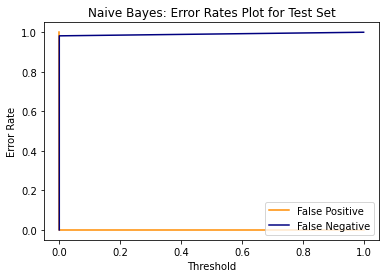

SVM Confusion Matrix for Training Set
[[ 84 115]
 [ 51 163]]
SVM Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.62      0.42      0.50       199
           1       0.59      0.76      0.66       214

    accuracy                           0.60       413
   macro avg       0.60      0.59      0.58       413
weighted avg       0.60      0.60      0.59       413

SVM Accuracy Score Training Set: 0.5980629539951574
SVM Confusion Matrix for Test Set
[[ 0 49]
 [ 0 55]]
SVM Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.53      1.00      0.69        55

    accuracy                           0.53       104
   macro avg       0.26      0.50      0.35       104
weighted avg       0.28      0.53      0.37       104

SVM Accuracy Score Test Set: 0.5288461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


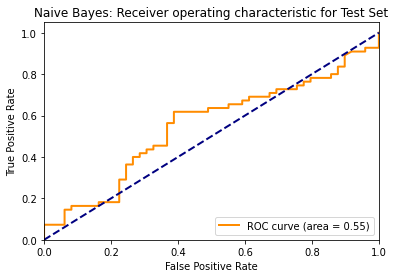

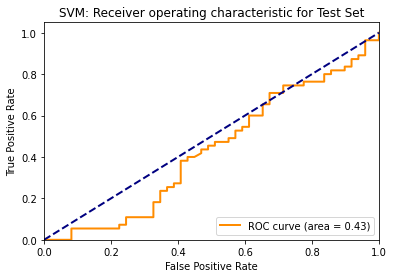

KNN Confusion Matrix for Training Set
[[ 98 101]
 [ 56 158]]
KNN Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.64      0.49      0.56       199
           1       0.61      0.74      0.67       214

    accuracy                           0.62       413
   macro avg       0.62      0.62      0.61       413
weighted avg       0.62      0.62      0.61       413

KNN Accuracy Score Training Set: 0.6198547215496368
KNN Confusion Matrix for Test Set
[[ 3 46]
 [10 45]]
KNN Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.23      0.06      0.10        49
           1       0.49      0.82      0.62        55

    accuracy                           0.46       104
   macro avg       0.36      0.44      0.36       104
weighted avg       0.37      0.46      0.37       104

KNN Accuracy Score Test Set: 0.46153846153846156


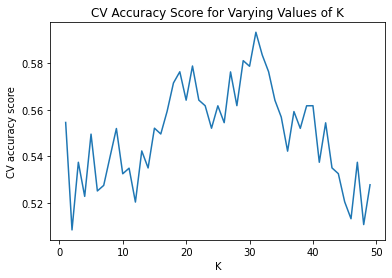

In [42]:
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fire = pd.read_csv('C:/Users/Travis Froberg/Documents/AA_MTU Graduate School/Data Mining Course/Datasets/forestfires.csv')

from google.colab import files
uploaded = files.upload()

Fire = pd.read_csv("forestfires.csv")

import statistics

# print(Fire.area)
# statistics.mean(Fire.area)

bins = [0, 0.1470]
names = ['0', '1']
# 0 means less than .1470 (the mean of Fire.area), 1 means greater
# names = ['< .147', '> .147']
d = dict(enumerate(names, 1))
Fire['area'] = np.vectorize(d.get)(np.digitize(Fire['area'], bins))

Fire['month'] = Fire['month'].astype('category')
Fire['month'] = Fire['month'].cat.codes

Fire['day'] = Fire['day'].astype('category')
Fire['day'] = Fire['day'].cat.codes

Fire['area'] = Fire['area'].astype('int')
# print(Fire)

Fire2 = Fire

y = Fire2.area

X = Fire2.drop(labels = ['area', 'rain'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train /= X_train.std(axis=0)  
X_test /= X_test.std(axis=0)  

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)

# Fit the training and test data using our model chosen by the training data
y_train_pred_Bayes = model.predict(X_train)
y_test_pred_Bayes = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#train error
from sklearn.metrics import confusion_matrix
print("Naive Bayes: Confusion Matrix for Training Set")
print(confusion_matrix(y_train,y_train_pred_Bayes))
print("Naive Bayes: Classification Report for Training Set")
print(classification_report(y_train, y_train_pred_Bayes))
print("Naive Bayes Accuracy Score Training Set:", accuracy_score(y_train, y_train_pred_Bayes))

print("Naive Bayes Confusion Matrix for Test Set")
print(confusion_matrix(y_test,y_test_pred_Bayes))
print("Naive Bayes Classification Report for Test Set")
print(classification_report(y_test, y_test_pred_Bayes))
print("Naive Bayes Accuracy Score Test Set:",accuracy_score(y_test, y_test_pred_Bayes))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# This similar code works for naive bayes, logistic regression, lda, random forest, etc.
y_gnb_score = model.predict_proba(X_test)

# compute false positive rate (fpr) and true positive rate (tpr; this is the same as "1- false negative rate").
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_gnb_score[:, 1])
roc_auc = auc(fpr_gnb, tpr_gnb)

# plot the error rates (similar to the plot at 15':04" in the video)
plt.figure()
plt.plot(thresholds_gnb,fpr_gnb, color='darkorange', label = "False Positive")
plt.plot(thresholds_gnb, 1 - tpr_gnb, color='navy', label = "False Negative")
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.legend(loc="lower right")
plt.title('Naive Bayes: Error Rates Plot for Test Set')
plt.show()

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes: Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")


# SVM

from sklearn.svm import SVC

# choosing tuning parameters C and kernal function 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

#C_range = np.logspace(-2, 10, 13)
#gamma_range = np.logspace(-9, 3, 13)
#param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
#grid.fit(X_train, y_train)

#bestSVM = grid.best_estimator_
#yfit = bestSVM.predict(X_test)

from sklearn.svm import SVC
SVM = SVC(kernel='linear', probability=True)
SVM.fit(X_train, y_train)

# Fit the training and test data using our model chosen by the training data
y_train_pred_SVM = SVM.predict(X_train)
y_test_pred_SVM = SVM.predict(X_test)

print("SVM Confusion Matrix for Training Set")
print(confusion_matrix(y_train, y_train_pred_SVM))  
print("SVM Classification Report for Training Set")
print(classification_report(y_train, y_train_pred_SVM))
print("SVM Accuracy Score Training Set:", accuracy_score(y_train, y_train_pred_SVM))

print("SVM Confusion Matrix for Test Set")
print(confusion_matrix(y_test, y_test_pred_SVM)) 
print("SVM Classification Report for Test Set")
print(classification_report(y_test, y_test_pred_SVM))
print("SVM Accuracy Score Test Set:", accuracy_score(y_test, y_test_pred_SVM))

# compute false positive rate (fpr) and true positive rate (tpr; this is the same as "1- false negative rate").
y_svm_score = SVM.fit(X_train, y_train).decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_score)
roc_auc = auc(fpr_svm, tpr_svm)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM: Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()

#KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

k_range = range(1,50) # This search over k=1,...,50. Adjust the range as you like.
cv_scores = []

for k in k_range:  
  knn_cv = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn_cv, X_train, y_train, cv=5) # This code uses 5-fold CV.
  cv_scores.append(scores.mean())

plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('CV accuracy score')
plt.title("CV Accuracy Score for Varying Values of K")

# Create KNN classifier with k=3, for instance.
knn = KNeighborsClassifier(n_neighbors = 50)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Test error in confusion matrix
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

print("KNN Confusion Matrix for Training Set")
print(confusion_matrix(y_train,y_train_pred_knn))
print("KNN Classification Report for Training Set")
print(classification_report(y_train, y_train_pred_knn))
print("KNN Accuracy Score Training Set:", accuracy_score(y_train, y_train_pred_knn))

print("KNN Confusion Matrix for Test Set")
print(confusion_matrix(y_test,y_test_pred_knn))
print("KNN Classification Report for Test Set")
print(classification_report(y_test, y_test_pred_knn))
print("KNN Accuracy Score Test Set:", accuracy_score(y_test, y_test_pred_knn))


Confusion Matrix for Training Set
[[ 97 102]
 [ 69 145]]
Classificaiton Report for Training Set
              precision    recall  f1-score   support

           0       0.58      0.49      0.53       199
           1       0.59      0.68      0.63       214

    accuracy                           0.59       413
   macro avg       0.59      0.58      0.58       413
weighted avg       0.59      0.59      0.58       413

Accuracy Score for Training Set: 0.585956416464891
Confusion Matrix for Test Set
[[ 0 49]
 [ 0 55]]
Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.53      1.00      0.69        55

    accuracy                           0.53       104
   macro avg       0.26      0.50      0.35       104
weighted avg       0.28      0.53      0.37       104

Accuracy Score for Test Set: 0.5288461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


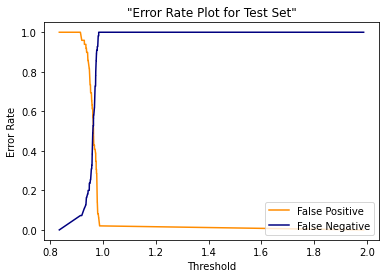

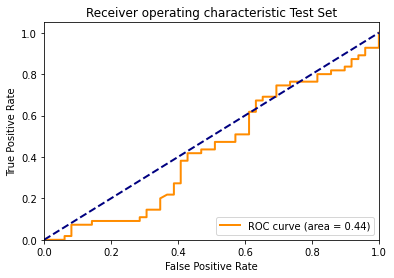

In [25]:
# Logistic Model 
from sklearn.linear_model import LogisticRegressionCV

# Initialize our classifier
logistic = LogisticRegressionCV()

# Train our classifier
model_logistic = logistic.fit(X_train, y_train)

# Fit the training and test data using our model chosen by the training data
y_train_pred_Log = logistic.predict(X_train)
y_test_pred_Log = logistic.predict(X_test)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix for Training Set")
print(confusion_matrix(y_train,y_train_pred_Log))

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#train error
print("Classificaiton Report for Training Set")
print(classification_report(y_train, y_train_pred_Log))
print("Accuracy Score for Training Set:", accuracy_score(y_train, y_train_pred_Log))

print("Confusion Matrix for Test Set")
print(confusion_matrix(y_test,y_test_pred_Log))
print("Classification Report for Test Set")
print(classification_report(y_test, y_test_pred_Log))
print("Accuracy Score for Test Set:", accuracy_score(y_test, y_test_pred_Log))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# This similar code works for naive bayes, logistic regression, lda, random forest, etc.
y_logistic_score = logistic.predict_proba(X_test)

# compute false positive rate (fpr) and true positive rate (tpr; this is the same as "1- false negative rate").
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_logistic_score[:, 1])
roc_auc = auc(fpr_gnb, tpr_gnb)

# plot the error rates (similar to the plot at 15':04" in the video)
plt.figure()
plt.plot(thresholds_gnb,fpr_gnb, color='darkorange', label = "False Positive")
plt.plot(thresholds_gnb, 1 - tpr_gnb, color='navy', label = "False Negative")
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.legend(loc="lower right")
plt.title('"Error Rate Plot for Test Set"')
plt.show()

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Test Set')
plt.legend(loc="lower right")


Classification Interpretation

Although I ran logistic regression after the other classification models, I still used logistic regression as a reference for comparison with the other models.

Note that a value of 0 for the response variable is a positive in this model. A 1 is negative. 

Logistic Regression did not work well on my data. While the training precision for both values of the response (0, 1) were better than the test set, they were not very good. For example, the accuracy score (# of 0's correctly classified) of the training set was only:
  Accuracy Score for Training Set: 0.585956416464891

The model had an accuracy score of 53% on the test set, however it had a precision of 0% for classifying 0's correctly. The model did not predict any of the observations to have a value of 0 (positive). 

The ROC curve for the test set is pretty close to the diagonal blue-dotted line which means the odds of the model classifying the response correctly were the same as would be predicted from chance alone. 

One aspect of the data that may be able to explain these problems is that it is possible the data cannot be separated well linearly. If this is the case, logistic regression will perform very poorly on it. It could be noted that LDA would also likely not perform well because it has the same assumption. 

It is also possible that the problem is arising because some of my predictors are correlated. In milestone 2, I created a scatterplots for all of the predictors vs. every other predictor and some had a linear correlation. For the most part it was pretty slight, but the variables "DMC" and "DC" seemed to have a heavy positive linear correlation.

Another problem could be that my response variable was highly skewed (was mostly 0's even when it is continuous). 

The same problems persisted for the Naive Bayes model and the SVM model. The ROC curve was very close to just being the diagonal-dotted blue line. Also, each of these models classified all of the observations as either 1 (as is the case with SVM) or 0 (which is the case with Naive Bayes.

It is not very surprising that the Gaussian Naive Bayes classfier did not do well. This is because it has a lot of assumptions. First, it assumes all the predictors have a normal distribution. I did not use BoxCox or any other transformation in pre-processing to resolve skewness of the predictors; I did this to preserve interpretability, but it is also possible it contributed to problems with the Naive Bayes classifier. 

KNN performed much better than any of the other models. This could be because it is non-parametric, which means the decision boundary is a lot more felxible than the other models; for example, in logistic regression, the boundary had to linear. This would support the hypothesis that the reason logistic regression performed so poorly is because the data cannot be classified with a linear boundery (too much overlap). 

The best value I had for the tuning parameter K in the KNN model was K= 32 which gave a test accuracy score of about .48. 

When I used K= 7 the test accuracy score was .44. When I used K = 50 I got a test set accuracy score of about .46. 

I chose K =32 based off the plot of K values vs. CV accuracy score. It shows that the CV score increases from about 1 to 32 and then starts to decrease. 

# Milestone 4 Trees 

Saving forestfires.csv to forestfires (13).csv


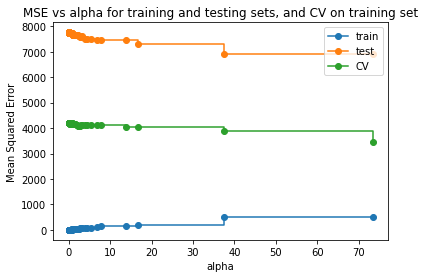

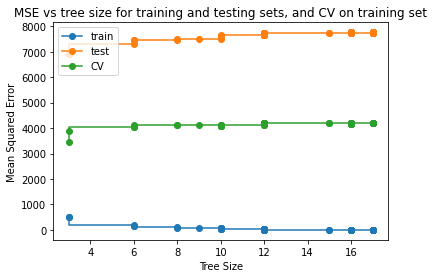

In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from google.colab import files
uploaded = files.upload()

Fire = pd.read_csv("forestfires.csv")

# Fire2 = Fire.drop(['rain'], axis = 1)

Fire2 = Fire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import itertools

Fire2['month'] = Fire2['month'].astype('category')
Fire2['month'] = Fire2['month'].cat.codes

Fire2['day'] = Fire2['day'].astype('category')
Fire2['day'] = Fire2['day'].cat.codes

y = Fire2.area
X = Fire2.drop(labels = 'area', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Decision Tree
df_dtr = DecisionTreeRegressor()
df_dtr = df_dtr.fit(X_train, y_train)

path = df_dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] #remove max value of alpha
regrs = []
for ccp_alpha in ccp_alphas:
    regr = DecisionTreeRegressor(random_state=2, ccp_alpha=ccp_alpha)
    regr.fit(X_train, y_train)
    regrs.append(regr)
    
# Calculate MSEs
# The first two lines are equivalent to 
# train_scores = [((y_train - regr.predict(X_train))**2).mean() for regr in regrs]
# test_scores = [((y_test - regr.predict(X_test))**2).mean() for regr in regrs]
train_scores = [mean_squared_error(y_train, regr.predict(X_train)) for regr in regrs]
test_scores =  [mean_squared_error(y_test, regr.predict(X_test)) for regr in regrs]
cv_scores = [-cross_val_score(regr, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean() for regr in regrs]

# MSE vs alpha plot
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Mean Squared Error")
ax.set_title("MSE vs alpha for training and testing sets, and CV on training set")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.plot(ccp_alphas, cv_scores, marker = 'o', label = "CV", drawstyle = "steps-post")
ax.legend()
plt.show()

# MSE vs tree size plot
depth = [regr.tree_.max_depth for regr in regrs]
fig, ax = plt.subplots()
ax.set_xlabel("Tree Size")
ax.set_ylabel("Mean Squared Error")
ax.set_title("MSE vs tree size for training and testing sets, and CV on training set")
ax.plot(depth, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(depth, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.plot(depth, cv_scores, marker = 'o', label = "CV", drawstyle = "steps-post")
ax.legend()
plt.show()

In [71]:
# feature importance plot of random forest
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

# Load iris data
# To learn more about this data, check
# https://scikit-learn.org/stable/datasets/index.html#iris-dataset
# iris = load_iris()

# X = iris.data
# y = iris.target

# Fit a random forest with number of trees = 20 and the number of features = sqrt(p)
reg_rf = RandomForestRegressor(n_estimators=2, max_features="sqrt", criterion='mse', ccp_alpha= 37)
reg_rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=37, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

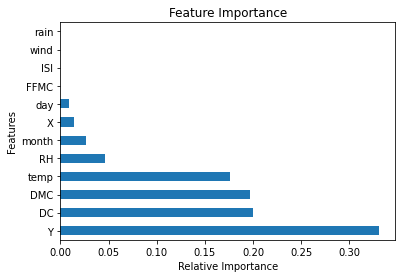

In [72]:
# Feature Importance Graph

# print(reg_rf.feature_importances_)
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

# Reference: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e#:~:text=Feature%20importance%20gives%20you%20a%20score%20for%20each,extracting%20the%20top%2010%20features%20for%20the%20dataset.

In [74]:
# Use model to predict on test set 

# Predict 
predictedValuesRF = reg_rf.predict(X_test)
# print(predictedValuesRF)

mseRF = mean_squared_error(y_test, predictedValuesRF)
print("Random Forest RMSE of Test Set:", math.sqrt(mseRF))

# df_coefRF = pd.concat([pd.DataFrame({'Random Forest':model.coef_})])
# print(df_coefRF)

Random Forest RMSE of Test Set: 83.0041797021793


Decision Tree Interpretation 

Random Forest did okay on my dataset. The RMSE for the test set was about as good as ridge regression (altough my predictors are not linearly related to the response, so Ridge didn't do that great). One reason why I think it did okay is because Random Forest deccorelates predictors when buiilding the tree. This may have improved my model because there were a couple of predictors in my dataset that seemed to be correlated (notably the variables 'DMC' and 'DC'). 

# Milestone 5 Linkages 


In [44]:
# Linkages 

import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# Fire = pd.read_csv('C:/Users/Travis Froberg/Documents/AA_MTU Graduate School/Data Mining Course/Datasets/forestfires.csv')

bins = [0, 12.85]
names = ['0', '1']
d = dict(enumerate(names, 1))
Fire['area'] = np.vectorize(d.get)(np.digitize(Fire['area'], bins))

Fire['month'] = Fire['month'].astype('category')
Fire['month'] = Fire['month'].cat.codes

Fire['day'] = Fire['day'].astype('category')
Fire['day'] = Fire['day'].cat.codes

Fire['area'] = Fire['area'].astype('int')
# print(Fire)

Fire2 = Fire

y = Fire2.area

X = Fire2.drop(labels = ['area', 'rain'], axis = 1)



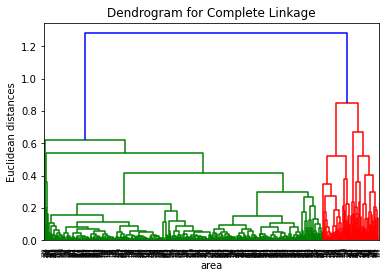

Complete Linkage (2 Clusters) Classification Accuracy: 0.8317214700193424


In [45]:
# Scale before Clustering 

from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

X_scaled = normalize(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

# Complete Linkage with 2 Clusters 

import scipy.cluster.hierarchy as sch
# Perform clustering on scaled data 
dendrogram2 = sch.dendrogram(sch.linkage(X_scaled_df, method = 'complete'))
plt.title('Dendrogram for Complete Linkage')
plt.xlabel('area')
plt.ylabel('Euclidean distances')
plt.show()

clusterModel_complete = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
clusterLabels_Complete = clusterModel_complete.fit_predict(X_scaled_df)

# print(clusterLabels_Complete) 

labelvsResponse_complete = np.c_[Fire2['area'], clusterLabels_Complete]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_complete = (Fire2['area'] == clusterLabels_Complete)

True_rate_complete = np.sum(labelvsareaBoolean_complete)
print("Complete Linkage (2 Clusters) Classification Accuracy:", (517-True_rate_complete)/517)
# References for code used above: 
# https://www.mltut.com/hierarchical-clustering-in-python-step-by-step-complete-guide/
# https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/#:~:text=1%20First%2C%20we%20assign%20all%20the%20points%20to,2%20until%20only%20a%20single%20cluster%20is%20left.
# https://stackoverflow.com/questions/8364674/how-to-count-the-number-of-true-elements-in-a-numpy-bool-array

In [47]:
# Complete Linkage with 3 Clusters

clusterModel_complete3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
clusterLabels_Complete3 = clusterModel_complete3.fit_predict(X_scaled_df)

# print(clusterLabels_Complete3) 

labelvsResponse_complete3 = np.c_[Fire2['area'], clusterLabels_Complete3]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_complete3 = (Fire2['area'] == clusterLabels_Complete3)

True_rate_complete3 = np.sum(labelvsareaBoolean_complete3)
print("Complete Linkage (3 Clusters) Classification Accuracy:", (517-True_rate_complete3)/517)

# Complete Linkage with 4 Clusters 


clusterModel_complete4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
clusterLabels_Complete4 = clusterModel_complete4.fit_predict(X_scaled_df)

# print(clusterLabels_Complete4) 

labelvsResponse_complete4 = np.c_[Fire2['area'], clusterLabels_Complete4]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_complete4 = (Fire2['area'] == clusterLabels_Complete4)

True_rate_complete4 = np.sum(labelvsareaBoolean_complete4)
print("Complete Linkage (4 Clusters) Classification Accuracy:", (True_rate_complete4)/517)


Complete Linkage (3 Clusters) Classification Accuracy: 0.9148936170212766
Complete Linkage (4 Clusters) Classification Accuracy: 0.8317214700193424


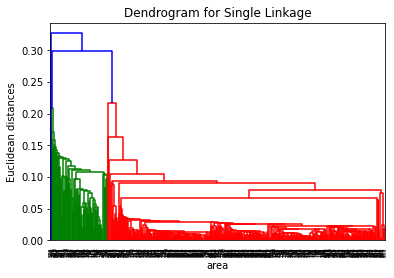

Single Linkage (3 Clusters) Classification Accuracy: 0.8297872340425532


In [48]:
# Single Linkage with 3 Clusters

import scipy.cluster.hierarchy as sch
# Perform clustering on scaled data 
dendrogram_single = sch.dendrogram(sch.linkage(X_scaled_df, method = 'single'))
plt.title('Dendrogram for Single Linkage')
plt.xlabel('area')
plt.ylabel('Euclidean distances')
plt.show()

clusterModel_Single3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
clusterLabels_Single3 = clusterModel_Single3.fit_predict(X_scaled_df)

# print(clusterLabels_Single3) 

labelvsResponse_Single3 = np.c_[Fire2['area'], clusterLabels_Single3]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_Single3 = (Fire2['area'] == clusterLabels_Single3)

True_rate_Single3 = np.sum(labelvsareaBoolean_Single3)
print("Single Linkage (3 Clusters) Classification Accuracy:", (True_rate_Single3)/517)

In [49]:
# Single Linkage with 4 Clusters

clusterModel_Single4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'single')
clusterLabels_Single4 = clusterModel_Single4.fit_predict(X_scaled_df)

# print(clusterLabels_Single4) 

labelvsResponse_Single4 = np.c_[Fire2['area'], clusterLabels_Single4]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_Single4 = (Fire2['area'] == clusterLabels_Single4)

True_rate_Single4 = np.sum(labelvsareaBoolean_Single4)
print("Single Linkage (4 Clusters) Classification Accuracy:", (517-True_rate_Single4)/517)

# Single Linkage with 5 Clusters

clusterModel_Single5 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
clusterLabels_Single5 = clusterModel_Single5.fit_predict(X_scaled_df)

# print(clusterLabels_Single5) 

labelvsResponse_Single5 = np.c_[Fire2['area'], clusterLabels_Single5]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_Single5 = (Fire2['area'] == clusterLabels_Single5)

True_rate_Single5 = np.sum(labelvsareaBoolean_Single5)
print("Single Linkage (5 Clusters) Classification Accuracy:",(517-True_rate_Single5)/517)

Single Linkage (4 Clusters) Classification Accuracy: 0.8317214700193424
Single Linkage (5 Clusters) Classification Accuracy: 0.8336557059961315


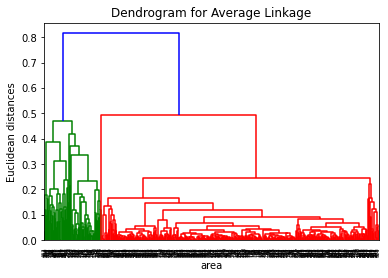

Average Linkage (2 Clusters) Classification Accuracy: 0.8297872340425532


In [50]:
# Average Linkage with 2 Clusters

import scipy.cluster.hierarchy as sch
# Perform clustering on scaled data 
dendrogram_average = sch.dendrogram(sch.linkage(X_scaled_df, method = 'average'))
plt.title('Dendrogram for Average Linkage')
plt.xlabel('area')
plt.ylabel('Euclidean distances')
plt.show()

clusterModel_Average2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
clusterLabels_Average2 = clusterModel_Average2.fit_predict(X_scaled_df)

# print(clusterLabels_Average2) 

labelvsResponse_Average2 = np.c_[Fire2['area'], clusterLabels_Average2]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_Average2 = (Fire2['area'] == clusterLabels_Average2)

True_rate_Average2 = np.sum(labelvsareaBoolean_Average2)
print("Average Linkage (2 Clusters) Classification Accuracy:",(True_rate_Average2)/517)


In [51]:
# Average Linkage with 4 Clusters

clusterModel_Average4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
clusterLabels_Average4 = clusterModel_Average4.fit_predict(X_scaled_df)

# print(clusterLabels_Average4) 

labelvsResponse_Average4 = np.c_[Fire2['area'], clusterLabels_Average4]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_Average4 = (Fire2['area'] == clusterLabels_Average4)

True_rate_Average4 = np.sum(labelvsareaBoolean_Average4)
print("Average Linkage (4 Clusters) Classification Accuracy:",(517-True_rate_Average4)/517)

# Average Linkage with 5 Clusters

clusterModel_Average5 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
clusterLabels_Average5 = clusterModel_Average5.fit_predict(X_scaled_df)

# print(clusterLabels_Average5) 

labelvsResponse_Average5 = np.c_[Fire2['area'], clusterLabels_Average5]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_Average5 = (Fire2['area'] == clusterLabels_Average5)

True_rate_Average5 = np.sum(labelvsareaBoolean_Average5)
print("Average Linkage (5 Clusters) Classification Accuracy:",(517-True_rate_Average5)/517)

# Average Linkage with 6 Clusters

clusterModel_Average6 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average')
clusterLabels_Average6 = clusterModel_Average6.fit_predict(X_scaled_df)

# print(clusterLabels_Average6) 

labelvsResponse_Average6 = np.c_[Fire2['area'], clusterLabels_Average6]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_Average6 = (Fire2['area'] == clusterLabels_Average6)

True_rate_Average6 = np.sum(labelvsareaBoolean_Average6)
print("Average Linkage (6 Clusters) Classification Accuracy:",(517-True_rate_Average6)/517)

Average Linkage (4 Clusters) Classification Accuracy: 0.9032882011605415
Average Linkage (5 Clusters) Classification Accuracy: 0.9264990328820116
Average Linkage (6 Clusters) Classification Accuracy: 0.9052224371373307


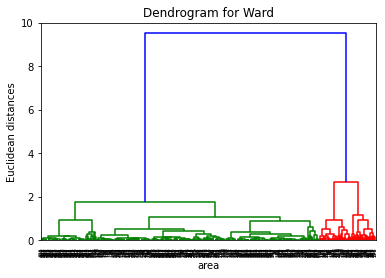

Ward Linkage (2 Clusters) Classification Accuracy: 0.8317214700193424


In [52]:
# Ward Linkage with 2 Clusters

import scipy.cluster.hierarchy as sch
# Perform clustering on scaled data 
dendrogram_ward = sch.dendrogram(sch.linkage(X_scaled_df, method = 'ward'))
plt.title('Dendrogram for Ward')
plt.xlabel('area')
plt.ylabel('Euclidean distances')
plt.show()

clusterModel_Ward2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
clusterLabels_Ward2 = clusterModel_Ward2.fit_predict(X_scaled_df)

# print(clusterLabels_Ward2) 

labelvsResponse_Ward2 = np.c_[Fire2['area'], clusterLabels_Ward2]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_Ward2 = (Fire2['area'] == clusterLabels_Ward2)

True_rate_Ward2 = np.sum(labelvsareaBoolean_Ward2)
print("Ward Linkage (2 Clusters) Classification Accuracy:",(517-True_rate_Ward2)/517)


In [53]:
# Ward Linkage with 3 Clusters

clusterModel_Ward3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
clusterLabels_Ward3 = clusterModel_Ward3.fit_predict(X_scaled_df)

# print(clusterLabels_Ward3) 

labelvsResponse_Ward3 = np.c_[Fire2['area'], clusterLabels_Ward3]

import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(labelvsResponse_complete)

# np.set_printoptions(threshold=sys.maxsize)
labelvsareaBoolean_Ward3 = (Fire2['area'] == clusterLabels_Ward3)

True_rate_Ward3 = np.sum(labelvsareaBoolean_Ward3)
print("Ward Linkage (3 Clusters) Classification Accuracy:",(True_rate_Ward3)/517)


Ward Linkage (3 Clusters) Classification Accuracy: 0.8317214700193424


Clustering techniques are unsupervised methods and so do not need to be used to predict on a response variable, however, for this report I did use them for prediciton. 

Overall, clustering was pretty effective at classifying the response variable with accuracies all over .80 and some above .90. 

The best cluster models were as follows: 

Complete Linkage (3 Clusters) Classification Accuracy: 0.9148936170212766

Average Linkage (4 Clusters) Classification Accuracy: 0.9032882011605415

Average Linkage (5 Clusters) Classification Accuracy: 0.9264990328820116

Average Linkage (6 Clusters) Classification Accuracy: 0.9052224371373307

Overall, average linkage seemed to work the best for this data, however it should be noted that its accuracy was around .83 when only 2 clusters were used. It seems that it needs about 5 clusters to perform its best; at 4 and 6 clusters it performs worse. 

 A general rule of thumb for picking the amount of clusters to use is to look at the dendrogram and put a line through the longest vertical lines; this line separates the diagram into the appropriate amount of clusters. This generally was true for my data. 

For example, in the case of ward linkage the dendrogram should obviously be split into two clusters (if the rule of thumb is being used). And in fact, the model doesn't do much better when 3 clusters are used. 

In the average linkage model, the number of clusters to use was much less obvious. Good guesses would be anywhere from 2-5 clusters. And in fact, the best number of clusters turned out to be 5 clusters. 

Complete linkage wsa much like average linkage in that a good guess for the optimal number of clusters based on the dendrogram would be 2 to 4. And the best number ended up being 3 (by a very large margin, almost .10). 

From discussion 5.1, I concluded that complete linkage would do pretty well on data that is not separated very distinctly because

"It makes more sense for a complete linkage model to do better on data that is very close together, because it combines clusters by using the two points in the clusters which are furthest from each other – as the distance by which to compare with other possible combinations of clusters." 

I also concluded that sinlge linkage does better on data that is pretty distinctly separated. 

Because complete linkage did much better than single linkage on my dataset, I think a reasonable hypothesis is that my data probably isn't separated very distinctly. 